In [177]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, DataLoader
from torchvision.utils import make_grid

import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import seaborn as sn

from sklearn.metrics import confusion_matrix

In [178]:
transform = transforms.ToTensor()

In [179]:
train_data = datasets.CIFAR10(root='./data', train=True, transform=transform, download=True)

Files already downloaded and verified


In [180]:
test_data = datasets.CIFAR10(root='./data', train=False, transform=transform, download=True)

Files already downloaded and verified


In [181]:
train_data

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [182]:
test_data

Dataset CIFAR10
    Number of datapoints: 10000
    Root location: ./data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [183]:
torch.manual_seed(101)

In [184]:
train_loader = DataLoader(train_data, batch_size=10, shuffle=True)
test_loader = DataLoader(test_data, batch_size=10, shuffle=False)

# Relu

In [186]:
class CNN_Relu(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 3, 1) 
        self.conv2 = nn.Conv2d(6, 16, 3, 1)
        self.fc1 = nn.Linear(6*6*16, 120)  
        self.fc2 = nn.Linear(120,84)
        self.fc3 = nn.Linear(84,10)

    def forward(self, X):
        X = F.relu(self.conv1(X))
        X = F.max_pool2d(X, 2, 2)
        X = F.relu(self.conv2(X))
        X = F.max_pool2d(X, 2, 2)
        X = X.view(-1, 6*6*16)
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = self.fc3(X)
        return F.log_softmax(X, dim=1)

In [187]:
torch.manual_seed(101)
relu_model = CNN_Relu()

In [188]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(relu_model.parameters(), lr=0.001)

In [189]:
import time
start_time = time.time()

epochs = 10
train_losses = []
test_losses = []
train_correct = []
test_correct = []

for i in range(epochs):
    trn_corr = 0
    tst_corr = 0
    
    # Run the training batches
    for b, (X_train, y_train) in enumerate(train_loader):
        b+=1
        
        # Apply the model
        y_pred = relu_model.forward(X_train)
        loss = criterion(y_pred, y_train)
 
        # Tally the number of correct predictions
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        trn_corr += batch_corr
        
        # Update parameters
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Print interim results
        if b%1000 == 0:
            print(f'epoch: {i:2}  batch: {b:4} [{10*b:6}/50000]  loss: {loss.item():10.8f}  \
accuracy: {trn_corr.item()*100/(10*b):7.3f}%')
        
    train_losses.append(loss)
    train_correct.append(trn_corr)
        
    # Run the testing batches
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader):

            # Apply the model
            y_val = relu_model.forward(X_test)

            # Tally the number of correct predictions
            predicted = torch.max(y_val.data, 1)[1] 
            tst_corr += (predicted == y_test).sum()
            
    loss = criterion(y_val, y_test)
    test_losses.append(loss)
    test_correct.append(tst_corr)
        
print(f'\nDuration: {time.time() - start_time:.0f} seconds') # print the time elapsed  

epoch:  0  batch: 1000 [ 10000/50000]  loss: 1.74091792  accuracy:  24.370%
epoch:  0  batch: 2000 [ 20000/50000]  loss: 2.28505325  accuracy:  30.680%
epoch:  0  batch: 3000 [ 30000/50000]  loss: 1.41110420  accuracy:  34.463%
epoch:  0  batch: 4000 [ 40000/50000]  loss: 1.77556062  accuracy:  37.425%
epoch:  0  batch: 5000 [ 50000/50000]  loss: 0.87544328  accuracy:  39.820%
epoch:  1  batch: 1000 [ 10000/50000]  loss: 1.40881562  accuracy:  50.940%
epoch:  1  batch: 2000 [ 20000/50000]  loss: 1.13322639  accuracy:  51.780%
epoch:  1  batch: 3000 [ 30000/50000]  loss: 1.45552599  accuracy:  52.453%
epoch:  1  batch: 4000 [ 40000/50000]  loss: 1.10780263  accuracy:  52.767%
epoch:  1  batch: 5000 [ 50000/50000]  loss: 1.01513064  accuracy:  53.120%
epoch:  2  batch: 1000 [ 10000/50000]  loss: 1.21744430  accuracy:  56.320%
epoch:  2  batch: 2000 [ 20000/50000]  loss: 0.94388628  accuracy:  56.850%
epoch:  2  batch: 3000 [ 30000/50000]  loss: 1.29108834  accuracy:  56.983%
epoch:  2  b

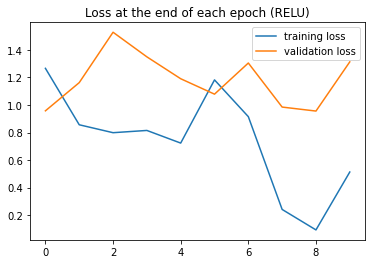

In [227]:
plt.plot(train_losses, label='training loss')
plt.plot(test_losses, label='validation loss')
plt.title('Loss at the end of each epoch (RELU)')
plt.legend();

# Sigmoid

In [193]:
class CNN_Sigmoid(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 3, 1) 
        self.conv2 = nn.Conv2d(6, 16, 3, 1)
        self.fc1 = nn.Linear(6*6*16, 120)  
        self.fc2 = nn.Linear(120,84)
        self.fc3 = nn.Linear(84,10)

    def forward(self, X):
        X = F.sigmoid(self.conv1(X))
        X = F.max_pool2d(X, 2, 2)
        X = F.sigmoid(self.conv2(X))
        X = F.max_pool2d(X, 2, 2)
        X = X.view(-1, 6*6*16)
        X = F.sigmoid(self.fc1(X))
        X = F.sigmoid(self.fc2(X))
        X = self.fc3(X)
        return F.log_softmax(X, dim=1)

In [195]:
sigmoid_model = CNN_Sigmoid()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(sigmoid_model.parameters(), lr=0.001)

In [196]:
import time
start_time = time.time()

epochs = 10
train_losses = []
test_losses = []
train_correct = []
test_correct = []

for i in range(epochs):
    trn_corr = 0
    tst_corr = 0
    
    # Run the training batches
    for b, (X_train, y_train) in enumerate(train_loader):
        b+=1
        
        # Apply the model
        y_pred = sigmoid_model.forward(X_train)
        loss = criterion(y_pred, y_train)
 
        # Tally the number of correct predictions
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        trn_corr += batch_corr
        
        # Update parameters
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Print interim results
        if b%1000 == 0:
            print(f'epoch: {i:2}  batch: {b:4} [{10*b:6}/50000]  loss: {loss.item():10.8f}  \
accuracy: {trn_corr.item()*100/(10*b):7.3f}%')
        
    train_losses.append(loss.tolist())
    train_correct.append(trn_corr.tolist())
        
    # Run the testing batches
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader):

            # Apply the model
            y_val = sigmoid_model.forward(X_test)

            # Tally the number of correct predictions
            predicted = torch.max(y_val.data, 1)[1] 
            tst_corr += (predicted == y_test).sum()
            
    loss = criterion(y_val, y_test)
    test_losses.append(loss.tolist())
    test_correct.append(tst_corr.tolist())
        
print(f'\nDuration: {time.time() - start_time:.0f} seconds') # print the time elapsed  

/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1967: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


epoch:  0  batch: 1000 [ 10000/50000]  loss: 1.86044431  accuracy:  13.430%
epoch:  0  batch: 2000 [ 20000/50000]  loss: 2.08329201  accuracy:  16.415%
epoch:  0  batch: 3000 [ 30000/50000]  loss: 2.06574464  accuracy:  18.630%
epoch:  0  batch: 4000 [ 40000/50000]  loss: 2.25300908  accuracy:  19.915%
epoch:  0  batch: 5000 [ 50000/50000]  loss: 1.67019403  accuracy:  21.048%
epoch:  1  batch: 1000 [ 10000/50000]  loss: 2.09849763  accuracy:  25.940%
epoch:  1  batch: 2000 [ 20000/50000]  loss: 2.02306056  accuracy:  26.135%
epoch:  1  batch: 3000 [ 30000/50000]  loss: 1.97460115  accuracy:  26.717%
epoch:  1  batch: 4000 [ 40000/50000]  loss: 1.92280602  accuracy:  26.902%
epoch:  1  batch: 5000 [ 50000/50000]  loss: 1.73729289  accuracy:  27.298%
epoch:  2  batch: 1000 [ 10000/50000]  loss: 1.76569438  accuracy:  29.520%
epoch:  2  batch: 2000 [ 20000/50000]  loss: 1.97002661  accuracy:  29.900%
epoch:  2  batch: 3000 [ 30000/50000]  loss: 2.19949794  accuracy:  30.277%
epoch:  2  b

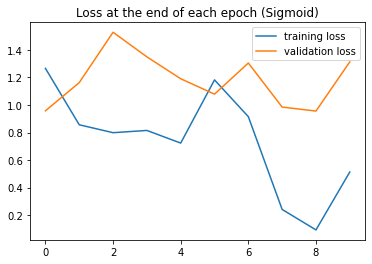

In [226]:
# train_losses= [ loss.detach().numpy() for loss in train_losses]
# test_losses= [ loss.detach().numpy() for loss in test_losses]
# relu_acc = 
plt.plot(train_losses, label='training loss')
plt.plot(test_losses, label='validation loss')
plt.title('Loss at the end of each epoch (Sigmoid)')
plt.legend();

In [199]:
class ModelSoup(nn.Module):
  def __init__(self, model1, model2):
        super(ModelSoup, self).__init__()
        self.model1 = model1
        self.model2 = model2

  def forward(self, x):
      output1 = self.model1.forward(x)
      accuracy1 = 69.090
      output2 = self.model2.forward(x)
      accuracy2 = 51.460
      output = output1 * accuracy1/(accuracy1 + accuracy2)
      output += output2 * accuracy2/(accuracy1 + accuracy2)
      return output

In [200]:
model_soup = ModelSoup(relu_model, sigmoid_model)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_soup.parameters(), lr=0.001)

In [202]:
import time
start_time = time.time()

epochs = 10
train_losses = []
test_losses = []
train_correct = []
test_correct = []

for i in range(epochs):
    trn_corr = 0
    tst_corr = 0
    
    # Run the training batches
    for b, (X_train, y_train) in enumerate(train_loader):
        b+=1
        
        # Apply the model
        y_pred = model_soup.forward(X_train)
        loss = criterion(y_pred, y_train)
 
        # Tally the number of correct predictions
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        trn_corr += batch_corr
        
        # Update parameters
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Print interim results
        if b%1000 == 0:
            print(f'epoch: {i:2}  batch: {b:4} [{10*b:6}/50000]  loss: {loss.item():10.8f}  \
accuracy: {trn_corr.item()*100/(10*b):7.3f}%')
        
    train_losses.append(loss.tolist())
    train_correct.append(trn_corr.tolist())
        
    # Run the testing batches
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader):

            # Apply the model
            y_val = model_soup.forward(X_test)

            # Tally the number of correct predictions
            predicted = torch.max(y_val.data, 1)[1] 
            tst_corr += (predicted == y_test).sum()
            
    loss = criterion(y_val, y_test)
    test_losses.append(loss.tolist())
    test_correct.append(tst_corr.tolist())
        
print(f'\nDuration: {time.time() - start_time:.0f} seconds') # print the time elapsed 

epoch:  0  batch: 1000 [ 10000/50000]  loss: 1.53384483  accuracy:  67.730%
epoch:  0  batch: 2000 [ 20000/50000]  loss: 0.39918008  accuracy:  68.585%
epoch:  0  batch: 3000 [ 30000/50000]  loss: 0.67139512  accuracy:  69.213%
epoch:  0  batch: 4000 [ 40000/50000]  loss: 0.70557898  accuracy:  69.418%
epoch:  0  batch: 5000 [ 50000/50000]  loss: 1.26604664  accuracy:  69.706%
epoch:  1  batch: 1000 [ 10000/50000]  loss: 0.41847950  accuracy:  72.980%
epoch:  1  batch: 2000 [ 20000/50000]  loss: 0.41607922  accuracy:  72.595%
epoch:  1  batch: 3000 [ 30000/50000]  loss: 0.56325877  accuracy:  72.697%
epoch:  1  batch: 4000 [ 40000/50000]  loss: 1.20650649  accuracy:  72.325%
epoch:  1  batch: 5000 [ 50000/50000]  loss: 0.85625064  accuracy:  72.172%
epoch:  2  batch: 1000 [ 10000/50000]  loss: 0.58990568  accuracy:  74.180%
epoch:  2  batch: 2000 [ 20000/50000]  loss: 0.35909674  accuracy:  73.915%
epoch:  2  batch: 3000 [ 30000/50000]  loss: 0.42125162  accuracy:  73.530%
epoch:  2  b

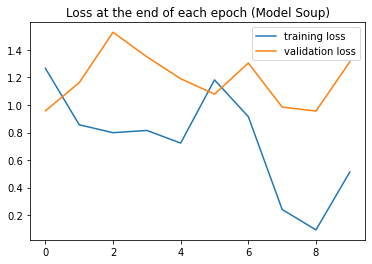

In [224]:
plt.plot(train_losses, label='training loss')
plt.plot(test_losses, label='validation loss')
plt.title('Loss at the end of each epoch (Model Soup)')
plt.legend();